In [5]:
import numpy as np
from scipy import stats
import pandas
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [6]:
from statsmodels.graphics.api import qqplot

In [7]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')
dta = pd.read_csv('C:/Users/Sort/Desktop/godrej_sale.csv', parse_dates='date', index_col='date',date_parser=dateparse)

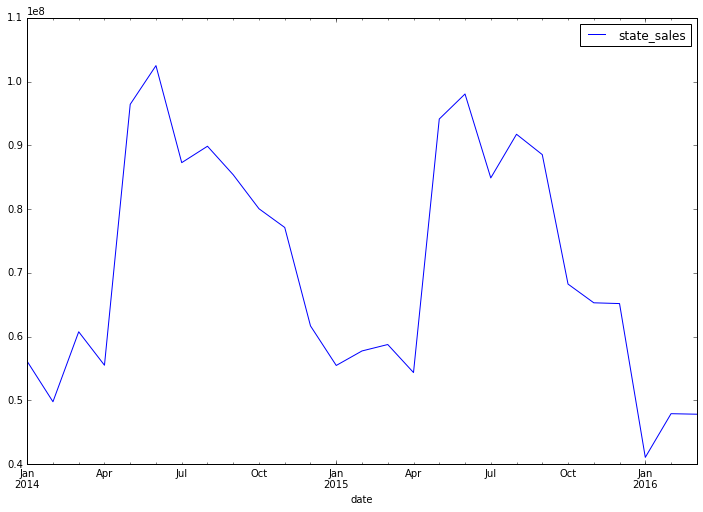

In [8]:
dta.plot(figsize=(12,8));

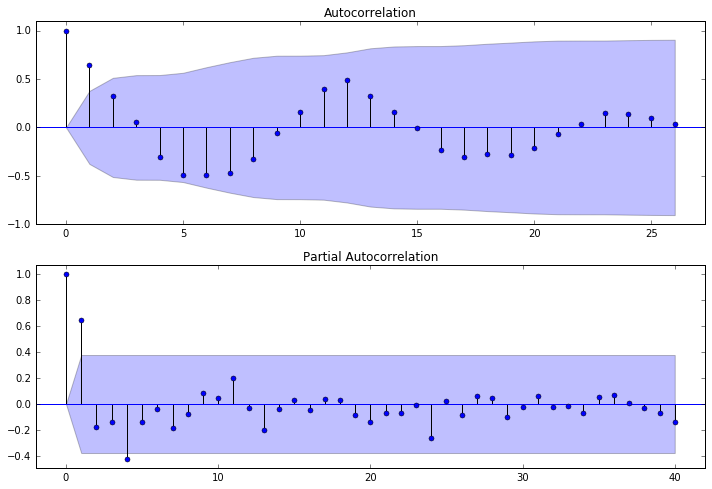

In [30]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,1,1)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), ax=ax1)
ax2 = fig.add_subplot(2,1,2)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

In [31]:
arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit()
print (arma_mod20.params)

const                7.117911e+07
ar.L1.state_sales    7.750600e-01
ar.L2.state_sales   -1.427863e-01
dtype: float64


In [32]:
arma_mod30 = sm.tsa.ARMA(dta, (3,0)).fit()

In [33]:
print (arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

970.1633036190697 975.346651083 971.704584549


In [34]:
sm.stats.durbin_watson(arma_mod30.resid.values)

1.9950348906319353

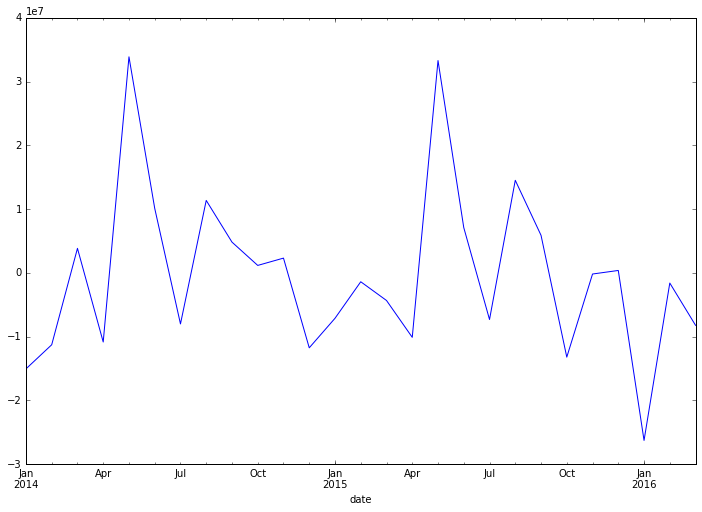

In [17]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);

In [35]:
resid = arma_mod30.resid

In [36]:
stats.normaltest(resid)

NormaltestResult(statistic=7.0190443838194643, pvalue=0.029911202837803255)

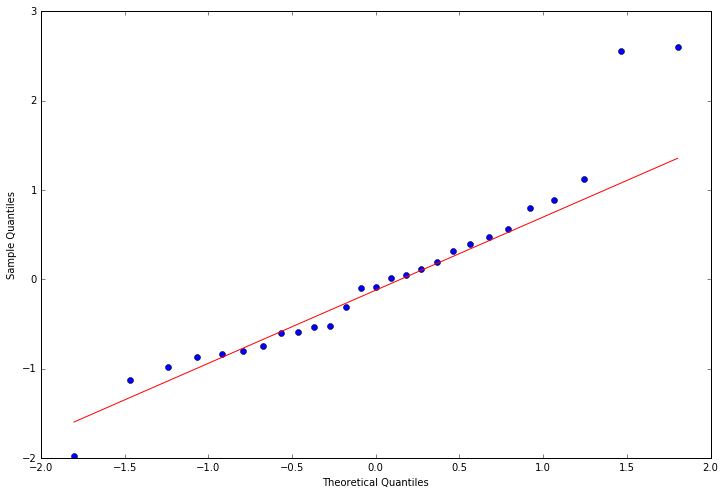

In [20]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

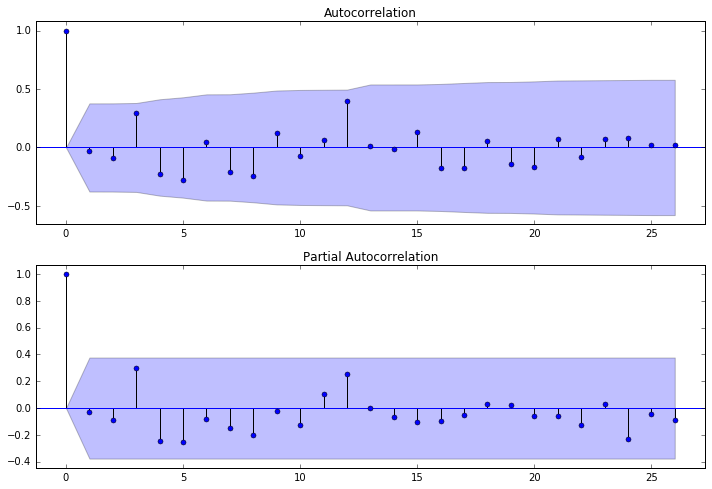

In [41]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,1,1)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(),ax=ax1)
ax2 = fig.add_subplot(2,1,2)
fig = sm.graphics.tsa.plot_pacf(resid, ax=ax2)

In [42]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[ r[1:], q, p]
table = pandas.DataFrame(data, columns=["AC", "Q", "Prob(>Q)"])
print (table.set_index('AC'))

                   Q  Prob(>Q)
AC                            
-0.028126   0.023823  0.877337
-0.090840   0.282270  0.868372
 0.298054   3.180548  0.364617
-0.225149   4.906286  0.297049
-0.279320   7.683085  0.174588
 0.048421   7.770503  0.255404
-0.211694   9.524989  0.217127
-0.247773  12.054961  0.148768
 0.127713  12.764474  0.173556
-0.073506  13.013338  0.222927
 0.067441  13.235919  0.278186
 0.400569  21.611711  0.042109
 0.011626  21.619272  0.061549
-0.011321  21.626991  0.086611
 0.129794  22.726231  0.090128
-0.178900  25.004424  0.069748
-0.172141  27.324656  0.053475
 0.055426  27.591928  0.068543
-0.143960  29.620330  0.056834
-0.170841  32.885066  0.034733
 0.072754  33.575829  0.040209
-0.080197  34.583008  0.042810
 0.075810  35.708012  0.044171
 0.078284  37.307527  0.040763
 0.022775  37.510607  0.051601
 0.025099  38.003854  0.060512


In [59]:
predict_sunspots = arma_mod30.predict('2014-01-01', '2016-12-01')
print(predict_sunspots)

2014-01-01    7.117911e+07
2014-02-01    6.106489e+07
2014-03-01    5.691669e+07
2014-04-01    6.635673e+07
2014-05-01    6.254944e+07
2014-06-01    9.238236e+07
2014-07-01    9.528972e+07
2014-08-01    7.849547e+07
2014-09-01    8.055871e+07
2014-10-01    7.888560e+07
2014-11-01    7.480599e+07
2014-12-01    7.343657e+07
2015-01-01    6.260310e+07
2015-02-01    5.914980e+07
2015-03-01    6.309267e+07
2015-04-01    6.447798e+07
2015-05-01    6.082920e+07
2015-06-01    9.095176e+07
2015-07-01    9.220274e+07
2015-08-01    7.721917e+07
2015-09-01    8.265211e+07
2015-10-01    8.145463e+07
2015-11-01    6.548715e+07
2015-12-01    6.480650e+07
2016-01-01    6.734578e+07
2016-02-01    4.951342e+07
2016-03-01    5.605830e+07
2016-04-01    5.853867e+07
2016-05-01    6.578522e+07
2016-06-01    7.065875e+07
2016-07-01    7.262678e+07
2016-08-01    7.295612e+07
2016-09-01    7.250139e+07
2016-10-01    7.190059e+07
2016-11-01    7.143293e+07
2016-12-01    7.116924e+07
Freq: MS, dtype: float64


C:\Users\Sort\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


In [54]:
print(dta.tail())

            state_sales
date                   
2015-11-01  65309706.63
2015-12-01  65187092.50
2016-01-01  41071976.93
2016-02-01  47921009.20
2016-03-01  47838245.92


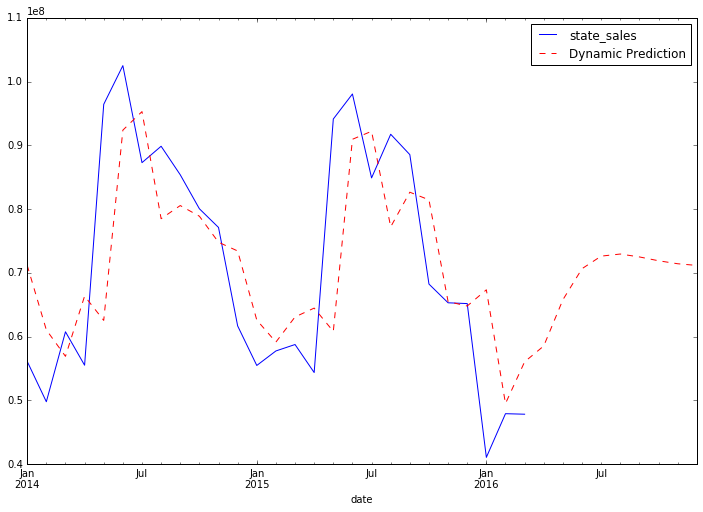

In [64]:
ax = dta.plot(figsize=(12,8))
ax = predict_sunspots.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();

In [65]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

In [68]:
mean_forecast_err(dta, predict_sunspots)

2014-01-01 00:00:00   NaN
2014-02-01 00:00:00   NaN
2014-03-01 00:00:00   NaN
2014-04-01 00:00:00   NaN
2014-05-01 00:00:00   NaN
2014-06-01 00:00:00   NaN
2014-07-01 00:00:00   NaN
2014-08-01 00:00:00   NaN
2014-09-01 00:00:00   NaN
2014-10-01 00:00:00   NaN
2014-11-01 00:00:00   NaN
2014-12-01 00:00:00   NaN
2015-01-01 00:00:00   NaN
2015-02-01 00:00:00   NaN
2015-03-01 00:00:00   NaN
2015-04-01 00:00:00   NaN
2015-05-01 00:00:00   NaN
2015-06-01 00:00:00   NaN
2015-07-01 00:00:00   NaN
2015-08-01 00:00:00   NaN
2015-09-01 00:00:00   NaN
2015-10-01 00:00:00   NaN
2015-11-01 00:00:00   NaN
2015-12-01 00:00:00   NaN
2016-01-01 00:00:00   NaN
2016-02-01 00:00:00   NaN
2016-03-01 00:00:00   NaN
2016-04-01 00:00:00   NaN
2016-05-01 00:00:00   NaN
2016-06-01 00:00:00   NaN
2016-07-01 00:00:00   NaN
2016-08-01 00:00:00   NaN
2016-09-01 00:00:00   NaN
2016-10-01 00:00:00   NaN
2016-11-01 00:00:00   NaN
2016-12-01 00:00:00   NaN
state_sales           NaN
dtype: float64

In [69]:
print(dta.tail())

            state_sales
date                   
2015-11-01  65309706.63
2015-12-01  65187092.50
2016-01-01  41071976.93
2016-02-01  47921009.20
2016-03-01  47838245.92


In [70]:
print (predict_sunspots)

2014-01-01    7.117911e+07
2014-02-01    6.106489e+07
2014-03-01    5.691669e+07
2014-04-01    6.635673e+07
2014-05-01    6.254944e+07
2014-06-01    9.238236e+07
2014-07-01    9.528972e+07
2014-08-01    7.849547e+07
2014-09-01    8.055871e+07
2014-10-01    7.888560e+07
2014-11-01    7.480599e+07
2014-12-01    7.343657e+07
2015-01-01    6.260310e+07
2015-02-01    5.914980e+07
2015-03-01    6.309267e+07
2015-04-01    6.447798e+07
2015-05-01    6.082920e+07
2015-06-01    9.095176e+07
2015-07-01    9.220274e+07
2015-08-01    7.721917e+07
2015-09-01    8.265211e+07
2015-10-01    8.145463e+07
2015-11-01    6.548715e+07
2015-12-01    6.480650e+07
2016-01-01    6.734578e+07
2016-02-01    4.951342e+07
2016-03-01    5.605830e+07
2016-04-01    5.853867e+07
2016-05-01    6.578522e+07
2016-06-01    7.065875e+07
2016-07-01    7.262678e+07
2016-08-01    7.295612e+07
2016-09-01    7.250139e+07
2016-10-01    7.190059e+07
2016-11-01    7.143293e+07
2016-12-01    7.116924e+07
Freq: MS, dtype: float64


In [74]:
predict_sunspots.to_csv('C:/Users/Sort/Desktop/predicted.csv', sep='\t', encoding='utf-8')